In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('house_data_fs.csv', index_col = 0)
df = df.dropna()
df1 = df.head(50)

### Linear regression model using a single feature

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
model = lr.fit(X_scaled, y)

### Visualization for Linear Regression model

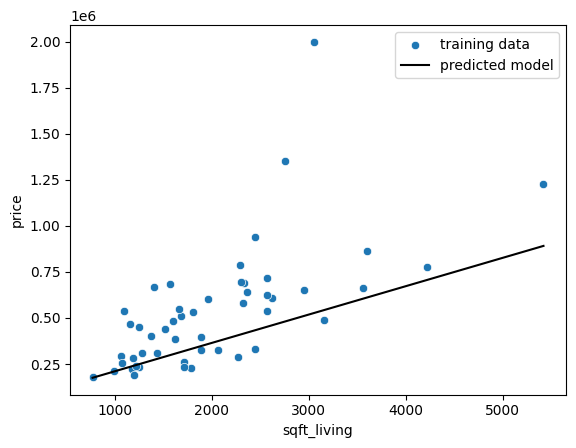

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

### Polynomial regression :
1) Feature scaling and Transform poly features 
2) model using a linear regression. 
3) Predict using the Model 

Degree	Train R²	Val R²		Train MSE		Val MSE
----------------------------------------------------------------------
1	0.4173		0.3765		6.22e+10	6.68e+10
2	0.4285		0.3025		6.10e+10	7.07e+10
3	0.4289		-0.9542		6.10e+10	1.82e+11
4	0.4488		-1.4146		5.88e+10	2.20e+11
5	0.4780		-131.4075		5.57e+10	1.17e+13
6	0.4843		-1453.5891		5.50e+10	1.29e+14
7	0.5250		-5516.6298		5.07e+10	4.89e+14
8	0.5257		-752923.2149		5.06e+10	6.67e+16
9	0.5296		-21592981.9261		5.02e+10	1.91e+18
10	0.5353		-642796189.2084		4.96e+10	5.70e+19

Optimal degree based on validation R²: 1


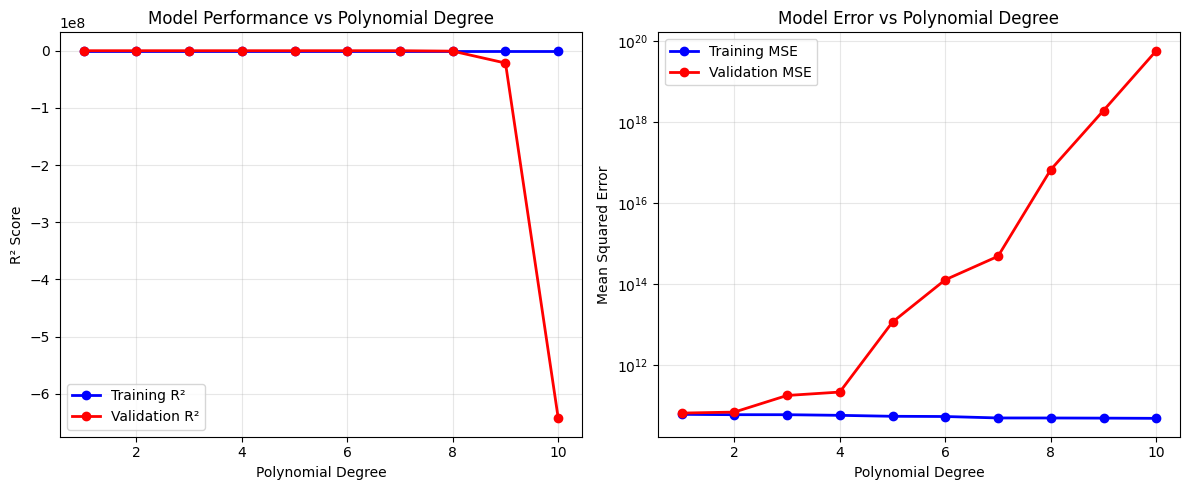


Final Model with Degree 1:
R²-score: 0.4173
Mean Squared Error: 6.22e+10
Mean Absolute Error: 161171.37
Model coefficients: [211051.60498044]
Model intercept: 532438.60


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Test different polynomial degrees to find optimal
degrees = range(1, 11)  # Test degrees 1 through 10
train_scores = []
val_scores = []
train_mse = []
val_mse = []

print("Degree\tTrain R²\tVal R²\t\tTrain MSE\t\tVal MSE")
print("-" * 70)

for degree in degrees:
    # Create pipeline with polynomial features and linear regression
    poly_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])
    
    # Fit the model
    poly_pipeline.fit(X_scaled, y)
    
    # Calculate training scores
    train_pred = poly_pipeline.predict(X_scaled)
    train_r2 = poly_pipeline.score(X_scaled, y)
    train_mse_val = mean_squared_error(y, train_pred)
    
    # Calculate validation scores using cross-validation
    cv_scores = cross_val_score(poly_pipeline, X_scaled, y, cv=5, scoring='r2')
    cv_mse_scores = -cross_val_score(poly_pipeline, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    
    val_r2 = cv_scores.mean()
    val_mse_val = cv_mse_scores.mean()
    
    train_scores.append(train_r2)
    val_scores.append(val_r2)
    train_mse.append(train_mse_val)
    val_mse.append(val_mse_val)
    
    print(f"{degree}\t{train_r2:.4f}\t\t{val_r2:.4f}\t\t{train_mse_val:.2e}\t{val_mse_val:.2e}")

# Find optimal degree based on validation score
optimal_degree = degrees[np.argmax(val_scores)]
print(f"\nOptimal degree based on validation R²: {optimal_degree}")

# Plot learning curves
plt.figure(figsize=(12, 5))

# Plot R² scores
plt.subplot(1, 2, 1)
plt.plot(degrees, train_scores, 'bo-', label='Training R²', linewidth=2)
plt.plot(degrees, val_scores, 'ro-', label='Validation R²', linewidth=2)
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Performance vs Polynomial Degree')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MSE scores
plt.subplot(1, 2, 2)
plt.plot(degrees, train_mse, 'bo-', label='Training MSE', linewidth=2)
plt.plot(degrees, val_mse, 'ro-', label='Validation MSE', linewidth=2)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Error vs Polynomial Degree')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()

# Train final model with optimal degree
poly = PolynomialFeatures(degree=optimal_degree, include_bias=False)
poly_features = poly.fit_transform(X_scaled)
lr = LinearRegression()
model = lr.fit(poly_features, y)

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print(f"\nFinal Model with Degree {optimal_degree}:")
print(f"R²-score: {rscore:.4f}")
print(f"Mean Squared Error: {mse:.2e}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.2f}")


### Visualization for Poly regression

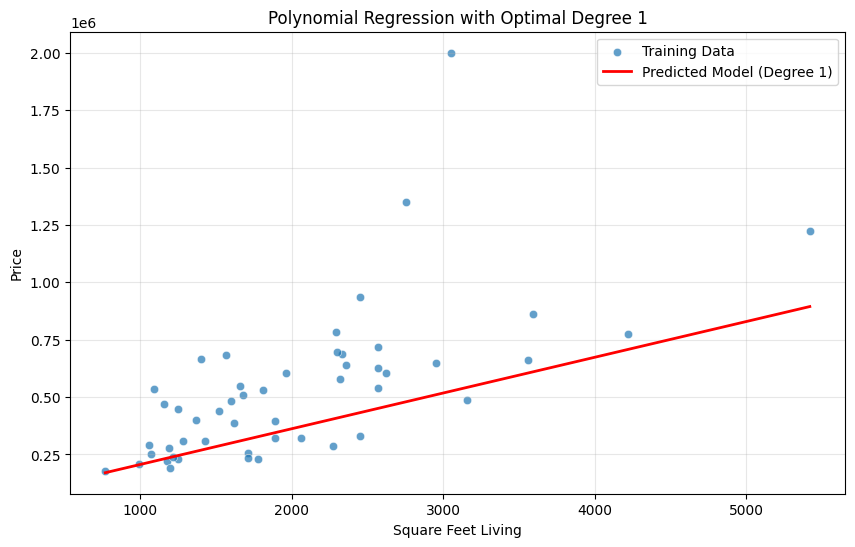

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price', alpha=0.7)
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 100)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'red', linewidth=2)
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title(f'Polynomial Regression with Optimal Degree {optimal_degree}')
plt.legend(['Training Data', f'Predicted Model (Degree {optimal_degree})'])
plt.grid(True, alpha=0.3)
plt.show()

### Saving Best Model for Deployment

In [6]:
import joblib

# Save the best model with optimal degree
print(f"Saving best model with degree {optimal_degree}")

# Create a pipeline that includes both preprocessing and modeling
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=optimal_degree, include_bias=False)),
    ('linear', LinearRegression())
])

# Fit the complete pipeline
X_raw = df1['sqft_living'].values.reshape(-1, 1)
best_pipeline.fit(X_raw, y)

# Save the complete pipeline
joblib.dump(best_pipeline, 'best_model.pkl')

# Evaluate final model
Y_pred = best_pipeline.predict(X_raw)
rscore = best_pipeline.score(X_raw, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print(f"\nFinal Saved Model Performance:")
print(f"Optimal degree: {optimal_degree}")
print(f"R²-score: {rscore:.4f}")
print(f"Mean Squared Error: {mse:.2e}")
print(f"Mean Absolute Error: {mae:.2f}")

Saving best model with degree 1

Final Saved Model Performance:
Optimal degree: 1
R²-score: 0.4173
Mean Squared Error: 6.22e+10
Mean Absolute Error: 161171.37
